### Importing dependencies

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import csv
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
import scipy

from scipy.stats import linregress

### Reading the data

In [2]:
# Study data files
world_suicide_data_path = "Suicide_Data/master.csv"
continent_path = "Suicide_Data/continents.csv"

# Read the data and the study results
world_suicide_data = pd.read_csv(world_suicide_data_path)
continent_data=pd.read_csv(continent_path)


   ### Studying the raw data files

In [3]:
continent_data.head()

,country,continent
0,Algeria,Africa
1,Angola,Africa
2,Aruba,South America
3,Benin,Africa
4,United States,North America


In [4]:
world_suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
# Fixed Republic of Korea in the continents and the titles then merge the two dataframes
world_suicide_df=world_suicide_data.merge(continent_data, on="country", how="left" )
world_suicide_df.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       'gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'continent'],
      dtype='object')

In [6]:
# Bring continent column rigth after the index next to the country column
world_suicide_df=world_suicide_df[[ 'continent','country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       'gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']]
world_suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   continent           27820 non-null  object 
 1   country             27820 non-null  object 
 2   year                27820 non-null  int64  
 3   sex                 27820 non-null  object 
 4   age                 27820 non-null  object 
 5   suicides_no         27820 non-null  int64  
 6   population          27820 non-null  int64  
 7   suicides/100k pop   27820 non-null  float64
 8   country-year        27820 non-null  object 
 9   HDI for year        8364 non-null   float64
 10  gdp_for_year ($)    27820 non-null  object 
 11  gdp_per_capita ($)  27820 non-null  int64  
 12  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 3.0+ MB


In [7]:
# Counting the number of data per to decide which years to filter
dseries=world_suicide_df["year"].value_counts()
dseries


2009    1068
2001    1056
2010    1056
2007    1032
2011    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2005    1008
2004    1008
1999     996
2012     972
2013     960
1998     948
2014     936
1995     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

In [8]:
# QA/QC for the number of countries vs. data counts
ds=world_suicide_df["country"].value_counts()
print(ds)

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
United States             372
                         ... 
Bosnia and Herzegovina     24
Dominica                   12
Cabo Verde                 12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64


In [9]:
# Main DataFrame Pre-Filtered merged with continents
world_suicide_df.head()

,continent,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Europe,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Europe,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Europe,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Europe,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Europe,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [10]:
#Write filtered data to new CSV
# Output File (CSV)
output_data_file = "Output_Data/merged.csv"

#Extract relevant fields from the data frame
# Export the City_Data into a csv
#world_suicide_df.to_csv(r'../output_data/merged.csv', index=False)
world_suicide_df.to_csv('Output_Data/merged.csv', index=False)

In [11]:
# #Filtering the data from 2000 to 2014

world_suicide_df_2 = world_suicide_df.loc[(world_suicide_df["year"]>1999) & (world_suicide_df["year"]<=2014) ]
#world_suicide_df_2.to_csv('Output_Data/new.csv', index=False)

In [12]:
# Dropping the countries which do not have consistent data between 2000 to 2014 and writing it to csv in case needed
# Later on I will merge new_df2 with the main dataframe two further filter the entire dataframe

new_df=world_suicide_df_2.groupby(["country"]).size()
new_df2=new_df.reset_index(name='count')
new_df2=new_df2.loc[new_df2["count"]==180]
new_df2.info()
new_df2.to_csv('Output_Data/new2.csv', index=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 2 to 94
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  58 non-null     object
 1   count    58 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [13]:
# New merge to create a brand new DataFrame for the new filtered DataFrame from 2000 to 2014
data_2000_2014=world_suicide_df_2.merge(new_df2, how="inner", on="country")
data_2000_2014.to_csv('Output_Data/2000_2014.csv', index=False)
data_2000_2014.head()


,continent,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,count
0,South America,Argentina,2000,male,75+ years,232,525161,44.18,Argentina2000,0.762,"284,203,750,000",8462,G.I. Generation,180
1,South America,Argentina,2000,male,55-74 years,602,2333377,25.80,Argentina2000,0.762,"284,203,750,000",8462,Silent,180
2,South America,Argentina,2000,male,35-54 years,578,4096814,14.11,Argentina2000,0.762,"284,203,750,000",8462,Boomers,180
3,South America,Argentina,2000,male,15-24 years,463,3306109,14.00,Argentina2000,0.762,"284,203,750,000",8462,Generation X,180
4,South America,Argentina,2000,male,25-34 years,331,2602314,12.72,Argentina2000,0.762,"284,203,750,000",8462,Generation X,180


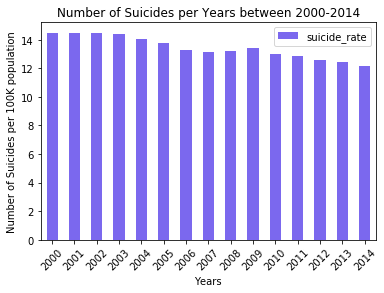

In [14]:
# Question 1 - Global Rate of Suicide increasing or Decreasing
global_15yrs=data_2000_2014.groupby("year").sum()
df_bar=global_15yrs.reset_index()
df_bar["suicide_rate"]=(df_bar["suicides_no"]/df_bar["population"])*100000
df_bar.plot(kind="bar",x="year", y="suicide_rate",rot=45, color="mediumslateblue")
plt.ylabel("Number of Suicides per 100K population")
plt.xlabel("Years")
plt.title("Number of Suicides per Years between 2000-2014")
plt.show()

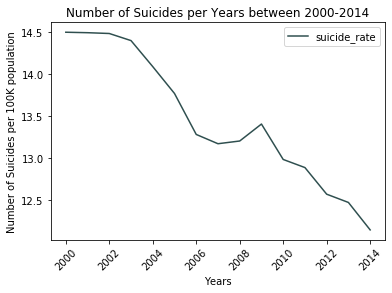

In [15]:
# Question 1-As line plot
df_bar.plot(kind="line",x="year", y="suicide_rate",rot=45, color="darkslategray")
plt.ylabel("Number of Suicides per 100K population")
plt.xlabel("Years")
plt.title("Number of Suicides per Years between 2000-2014")
plt.show()


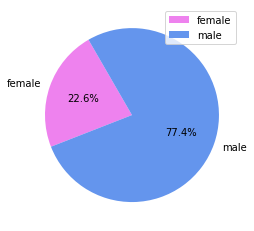

In [16]:
# Question 1a) - Global Rate of Suicide per sex
gender_15yrs=data_2000_2014.groupby("sex").sum()
gender_15yrs2=gender_15yrs[["suicides_no"]]
gender_15yrs2=gender_15yrs2.rename(columns={"suicides_no": " "})
gender_15yrs2=gender_15yrs2.plot(kind="pie",subplots=True, autopct="%1.1f%%",startangle=120,colors = ['violet', 'cornflowerblue'])
plt.show()


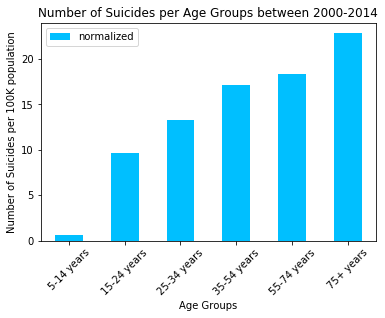

In [17]:
# Question 1b) - Global Rate of Suicide per AgeGroup
age_15yrs=data_2000_2014.groupby("age").sum()
df_age=age_15yrs.reset_index()
# list1=[2,3,4,1,5,6]
# series=pd.Series(list1)
df_age2 = df_age.assign(list1=[2,3,4,1,5,6]) 
df_age2["normalized"]=df_age2["suicides_no"]/(df_age2["population"]/100000)
df_age3=df_age2.sort_values(by=["list1"])

df_age3.plot(kind="bar",x="age", y="normalized",rot=45, color="deepskyblue")
plt.ylabel("Number of Suicides per 100K population")
plt.xlabel("Age Groups")
plt.title("Number of Suicides per Age Groups between 2000-2014")
plt.show()

In [18]:
gender_15yrs

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),count
sex,,,,,,,
female,10476540,712491,12022846328,29516.56,1848.054,123343692,939600
male,10476540,2440636,11448106398,113814.12,1848.054,123343692,939600


In [19]:
# New DataFrame for the most countries for year 2009, because it has the most countries.

data_2009 = world_suicide_df.loc[(world_suicide_df["year"]==2009)] 
data_2009.to_csv('Output_Data/2009.csv', index=False)
data_2009.head()

,continent,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
240,Europe,Albania,2009,female,15-24 years,0,270003,0.0,Albania2009,NaN,"12,044,212,904",4387,Millenials
241,Europe,Albania,2009,female,25-34 years,0,182712,0.0,Albania2009,NaN,"12,044,212,904",4387,Generation X
242,Europe,Albania,2009,female,35-54 years,0,394286,0.0,Albania2009,NaN,"12,044,212,904",4387,Boomers
243,Europe,Albania,2009,female,5-14 years,0,236174,0.0,Albania2009,NaN,"12,044,212,904",4387,Generation Z
244,Europe,Albania,2009,female,55-74 years,0,233302,0.0,Albania2009,NaN,"12,044,212,904",4387,Silent


In [20]:
#Aggregate the total suicide_no per country for 2009 for quality check

data_2009_agg=data_2009.groupby("country").agg({"suicides_no":["sum"]})
data_2009_agg.columns = ['total_suicide_number']
data_2009_agg_by_num=data_2009_agg.reset_index()
data_2009_to_drop=data_2009_agg_by_num.loc[data_2009_agg_by_num["total_suicide_number"]==0]
data_2009_to_drop

,country,total_suicide_number
0,Albania,0
1,Antigua and Barbuda,0
33,Grenada,0


In [21]:
#Remove zero values, count number of countries =86 and continents = 6
data_2009_i=data_2009.set_index(['country'])
data_2009_clean=data_2009_i.loc[~data_2009_i.index.isin(['Albania','Antigua and Barbuda', 'Grenada'])]
data_2009_clean=data_2009_clean.reset_index()
data_2009_clean

,country,continent,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Argentina,South America,2009,male,75+ years,177,653486,27.09,Argentina2009,NaN,"332,976,484,578",8961,Silent
1,Argentina,South America,2009,male,15-24 years,609,3436265,17.72,Argentina2009,NaN,"332,976,484,578",8961,Millenials
2,Argentina,South America,2009,male,55-74 years,434,2683502,16.17,Argentina2009,NaN,"332,976,484,578",8961,Silent
3,Argentina,South America,2009,male,25-34 years,504,3210244,15.70,Argentina2009,NaN,"332,976,484,578",8961,Generation X
4,Argentina,South America,2009,male,35-54 years,542,4566645,11.87,Argentina2009,NaN,"332,976,484,578",8961,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Uzbekistan,Asia,2009,female,75+ years,7,318983,2.19,Uzbekistan2009,NaN,"33,689,223,673",1332,Silent
1028,Uzbekistan,Asia,2009,female,35-54 years,65,3263931,1.99,Uzbekistan2009,NaN,"33,689,223,673",1332,Boomers
1029,Uzbekistan,Asia,2009,female,55-74 years,15,1105076,1.36,Uzbekistan2009,NaN,"33,689,223,673",1332,Silent
1030,Uzbekistan,Asia,2009,male,5-14 years,37,2805898,1.32,Uzbekistan2009,NaN,"33,689,223,673",1332,Generation Z


In [22]:
#Linear Regression
data_2009_clean



# x_values = northern_hem_df['Lat']
# y_values = northern_hem_df['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(20,38),fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')

# print(f"The r-squared is: {rvalue**2}")
# print(line_eq)


# plt.show()

,country,continent,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Argentina,South America,2009,male,75+ years,177,653486,27.09,Argentina2009,NaN,"332,976,484,578",8961,Silent
1,Argentina,South America,2009,male,15-24 years,609,3436265,17.72,Argentina2009,NaN,"332,976,484,578",8961,Millenials
2,Argentina,South America,2009,male,55-74 years,434,2683502,16.17,Argentina2009,NaN,"332,976,484,578",8961,Silent
3,Argentina,South America,2009,male,25-34 years,504,3210244,15.70,Argentina2009,NaN,"332,976,484,578",8961,Generation X
4,Argentina,South America,2009,male,35-54 years,542,4566645,11.87,Argentina2009,NaN,"332,976,484,578",8961,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Uzbekistan,Asia,2009,female,75+ years,7,318983,2.19,Uzbekistan2009,NaN,"33,689,223,673",1332,Silent
1028,Uzbekistan,Asia,2009,female,35-54 years,65,3263931,1.99,Uzbekistan2009,NaN,"33,689,223,673",1332,Boomers
1029,Uzbekistan,Asia,2009,female,55-74 years,15,1105076,1.36,Uzbekistan2009,NaN,"33,689,223,673",1332,Silent
1030,Uzbekistan,Asia,2009,male,5-14 years,37,2805898,1.32,Uzbekistan2009,NaN,"33,689,223,673",1332,Generation Z


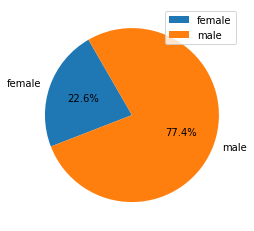

In [23]:
# Question 1a) - Global Rate of Suicide per sex for year 2009
gender_2009=data_2009_clean.groupby("sex").sum()
gender_2009_2=gender_2009[["suicides_no"]]
gender_2009_2=gender_2009_2.rename(columns={"suicides_no": " "})
gender_2009_2=gender_2009_2.plot(kind="pie",subplots=True, autopct="%1.1f%%",startangle=120)
plt.show()


In [24]:
gender_2009

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
sex,,,,,,
female,1036644,54920,1006509254,2418.08,0.0,11911452
male,1036644,188567,966793226,9757.96,0.0,11911452


The r-squared is: 0.0013388605890040572
y = 0.0x + 11.17


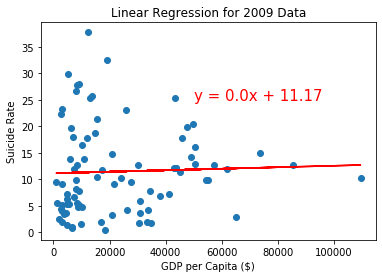

In [25]:
#Linear Regression

df_linear_2009=data_2009_clean.groupby("country").sum()
df_linear_2009=df_linear_2009.reset_index()
df_linear_2009["GDP per Capita"]=((df_linear_2009["gdp_per_capita ($)"]/12))
df_linear_2009["suicide_normalized"]=(df_linear_2009["suicides_no"]/df_linear_2009['population'])*100000

x_values = df_linear_2009['GDP per Capita']
y_values = df_linear_2009['suicide_normalized']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50000,25),fontsize=15, color="red")
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicide Rate')
plt.title('Linear Regression for 2009 Data')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)


plt.show()

In [26]:
# Multiple Linear Regression
# Creating a line equation with two x values and a y value

df_linear_2009=data_2009_clean.groupby("country").sum()
df_linear_2009=df_linear_2009.reset_index()
df_linear_2009["GDP per Capita"]=((df_linear_2009["gdp_per_capita ($)"]/12))
df_linear_2009["suicide_normalized"]=(df_linear_2009["suicides_no"]/df_linear_2009['population'])*100000

df_linear_2009["GDP per Capita"].values #x1
df_linear_2009['population'].values #x2
df_linear_2009["suicide_normalized"].values #y

# Defining x and y into arrays to use in the function
new_x = np.concatenate(([df_linear_2009["GDP per Capita"].values],[df_linear_2009['population'].values]))
new_y = df_linear_2009["suicide_normalized"].values

# The function below returns Multiple Linear Regression Coefficients a, b and c

def fn(x, a, b, c):
    return a + b*x[0] + c*x[1] 

popt, pcov = curve_fit(fn, new_x, new_y)
print(popt)

[1.09541571e+01 1.32890529e-05 1.01645443e-08]


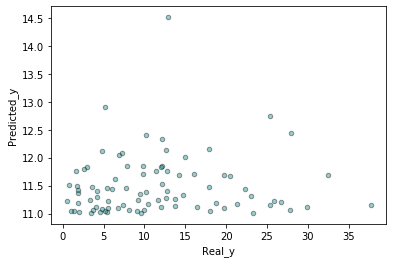

In [29]:
%matplotlib inline

# This is to create a prediction from the line equation to compare the y values (sucide rate) and predicted_y values 
# to undersand if the correlation works fine or not
predicted_y = fn(new_x, 1.09541571e+01,1.32890529e-05,1.01645443e-08 )

pr_y=pd.Series(predicted_y)
n_y=pd.Series(new_y)

frame={"Real_y":n_y, "Predicted_y":pr_y}
df_plot=pd.DataFrame(frame)
df_plot.head()
scatter_plot = df_plot.plot(kind='scatter',x="Real_y", y="Predicted_y",color = 'teal',alpha=0.4, edgecolors="black",marker="o")
scatter_plot
plt.show()


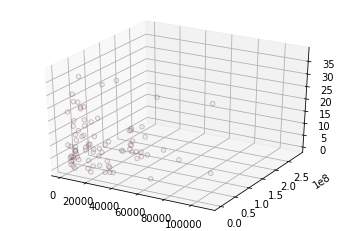

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(np.array(new_x[0]),np.array( new_x[1]), np.array(new_y), alpha=0.2, color="pink",edgecolors="black")
plt.show()